In [12]:
# -*- coding: utf-8 -*-
import jieba
import jieba.analyse
jieba.set_dictionary('dict.txt.big')##加入繁體中文

In [13]:
import re
from collections import Counter
import matplotlib.pyplot as plt

text = ""
words = []
dict = {}
weight = []

with open('hw1-dataset.txt',encoding="utf-8") as file:
    for i,line in enumerate(file.readlines()):
        line = re.sub("[A-Za-z0-9\：\?\(\.\·\—\，\。\“ \”]", "", line)

        ##if i == 500:
            ##break
        
        text += line;
        
        #建立分詞
        jieba.add_word('為什麼')
        jieba.add_word('有沒有')
        tags = jieba.lcut(line,cut_all=False)
        for tag in tags:
            if tag == "" or tag == '\t' or tag == '\n':
                continue;
            words.append(tag)
        
        c = Counter()
        index = 1
        for x in words:
            if len(x)>1 and x != '\r\n':
                c[x] += 1
                dict.setdefault(x, index)
                index = index + 1           

Building prefix dict from /Users/ruru/NLP/HW1/dict.txt.big ...
Loading model from cache /var/folders/7t/bb_qyqxs0s1d1slg3618dg8r0000gn/T/jieba.uc0493ae0fd8699218ec252cff7915e8a.cache
Loading model cost 0.890 seconds.
Prefix dict has been built succesfully.


## 統計前一百個高頻詞彙

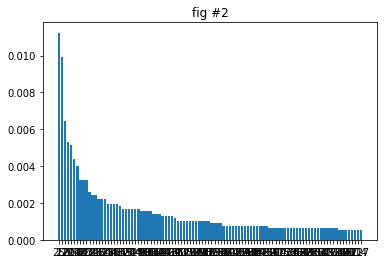

In [14]:
TotalWord = len(words)
x_label = []
y_label = []

with open('WordNumber_fig2.txt', 'a') as WordNum:
    WordNum.truncate(0)
    table = '字彙編號對應表_前一百個高頻詞彙\n\n'
    WordNum.write(table)
    table = "word        index\n\n"
    WordNum.write(table)
    for (k,v) in c.most_common(100):
        freq = v/TotalWord
        ##print("index %d %s:%d %f"%(dict[k],k, v, freq))
        
        ## 建立字彙編號對應表
        table = k.ljust(10)  + " " + str(dict[k]) + '\n'
        WordNum.write(table)

        x_label.append(str(dict[k]))
        y_label.append(freq)

plt.title('fig #2')
plt.bar(x_label,y_label)
plt.show()

## 統計前一百個TF-IDF權重⾼詞彙

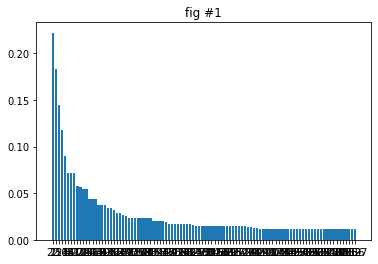

In [15]:
with open('WordNumber_fig1.txt', 'a') as WordNum:
    WordNum.truncate(0)
    table = '字彙編號對應表_前一百個TF-IDF權重⾼詞彙\n\n'
    WordNum.write(table)
    table = "word        index\n\n"
    WordNum.write(table)
    
    weight = jieba.analyse.extract_tags(text, topK = 100, withWeight=True)
    x_label = []
    y_label = []

    for w in weight:
        ##print("word ", dict[w[0]], ":", w[0]," weight: ", w[1])
        ## 建立字彙編號對應表
        table = w[0].ljust(10)  + " " + str(dict[w[0]]) + '\n'
        WordNum.write(table)

        x_label.append(str(dict[w[0]]))
        y_label.append(w[1])
    
plt.title('fig #1')
plt.bar(x_label,y_label)
plt.show()